In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

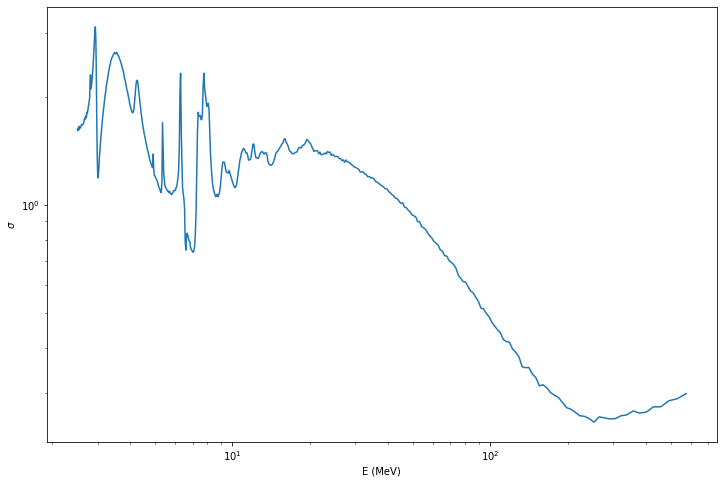

In [ ]:
#Datos de la sección eficaz total para el n-12C tomados de EXFOR nuclear data library"
column_names = ["Columna1","Columna2", "$n$-$_{}^{12}$C", "Columna4", "Columna5"]
df = pd.read_csv("data 1. C.D.Pruitt.txt", delim_whitespace=True, header=None, names= column_names)

cross_section = df["$n$-$_{}^{12}$C"]
E = df["Columna1"]

plt.figure(figsize=(12, 8))
plt.plot(E, cross_section)
plt.xlabel("E (MeV)")
plt.ylabel("$\\sigma$")
plt.title("")
plt.xscale("log")
plt.yscale("log")
plt.grid(False)
plt.show()

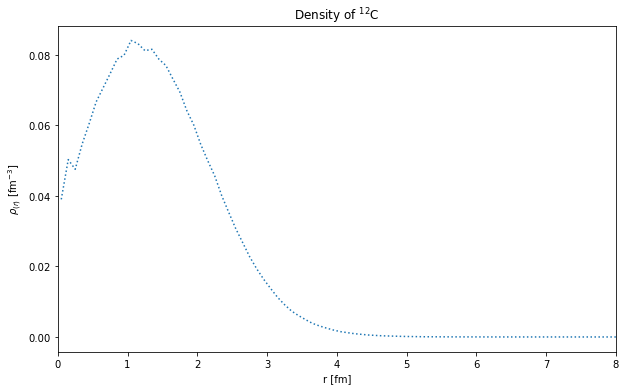

In [ ]:
densities = ["r", "$\\rho$", "error"]
df = pd.read_csv("density12C.txt", delim_whitespace=True, header=None, names= densities)

#Valores experimentales tomados de https://www.phy.anl.gov/theory/research/density/
density = df["$\\rho$"]
r = df["r"]

plt.figure(figsize = (10,6))
plt.plot(r, density, linestyle = "dotted")
plt.title("Density of $_{}^{12}$C")
plt.xlabel("r [fm]")
plt.ylabel("$\\rho_{(r)}$ [fm$^{-3}$]")
plt.xlim(0,8)
plt.show()

Densidad de C.A Bertulani pag. 432

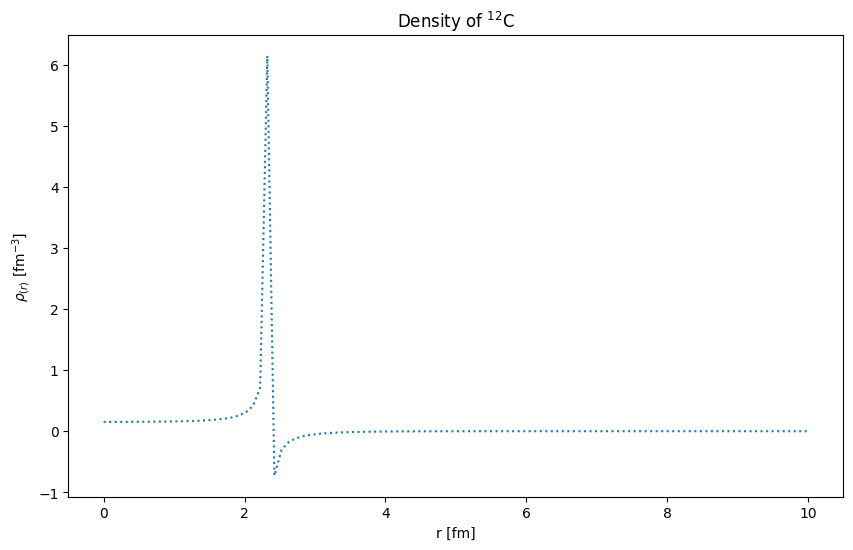

In [9]:
#Potencial

def den(r):
  A=12
  c=2.335
  a=0.522
  d=-0.149
  R=1.3*A**(1/3)
  den0=3*A/( 4*np.pi*c**3 * (1+(np.pi**2*a**2/c**2)) )
  density = den0 * (1 + d * r ** 2 / R ** 2) / (1 - np.exp((r - c) / a))
  return density

rn=np.linspace(0,10,100)
dens=[]
for ri in rn:
  dens.append(den(ri))

plt.figure(figsize=(10, 6))
plt.plot(rn, dens, linestyle="dotted")
plt.title("Density of $_{}^{12}$C")
plt.xlabel("r [fm]")
plt.ylabel("$\\rho_{(r)}$ [fm$^{-3}$]")
plt.show()


In [ ]:
def const(E):
  if E==40:
    sp=7
    ap=1.328
    sn=21.8
    an=0.493
  elif E==60:
    sp=4.7
    ap=1.626
    sn=13.6
    an=0.719
  elif E==80:
    sp=3.69
    ap=1.783
    sn=9.89
    an=0.344
  elif E==100:
    sp=3.16
    ap=1.808
    sn=7.87
    an=0.293
  elif E==120:
    sp=2.85
    ap=1.754
    sn=6.63
    an=0.248
  elif E==140:
    sp=2.65
    ap=1.644
    sn=5.82
    an=0.21
  elif E==160:
    sp=2.52
    ap=1.509
    sn=5.26
    an=0.181
  return sp,ap,sn,an

def potim(E,r):
  sp,ap,sn,an=const(E)
  pot=(sn*an-sp*ap)*den(r)

def integral(E,r):
